In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
from adjustText import adjust_text
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Filter Data in Scandinavia and drop NaN salaries
df_Scand = df[df['job_country'].isin(['Norway', 'Sweden', 'Finland'])].copy().dropna(subset ='salary_year_avg')



In [3]:
#Find number of jobs by title and reset index to convert into a DataFrame, as this one is type Series
job_count = df_Scand['job_title_short'].value_counts().reset_index()
job_count


,job_title_short,count
0,Data Scientist,24
1,Data Analyst,18
2,Data Engineer,17
3,Machine Learning Engineer,8
4,Senior Data Engineer,8
5,Business Analyst,7
6,Senior Data Analyst,6
7,Senior Data Scientist,5
8,Software Engineer,2


In [4]:
#Grouping by job title and calculating median salary
df_Scand_job_salary = df_Scand.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False)
df_Scand_job_salary = df_Scand_job_salary.reset_index()
df_Scand_job_salary

,job_title_short,salary_year_avg
0,Senior Data Scientist,157500.0
1,Senior Data Engineer,147500.0
2,Machine Learning Engineer,141000.0
3,Data Scientist,131846.5
4,Software Engineer,115750.0
5,Senior Data Analyst,111175.0
6,Data Analyst,99500.0
7,Data Engineer,98301.5
8,Business Analyst,89100.0


C:\Users\Nora\AppData\Local\Temp\ipykernel_22780\3109469588.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_Scand_job_salary, x='salary_year_avg', y='job_title_short', palette = 'dark:b')


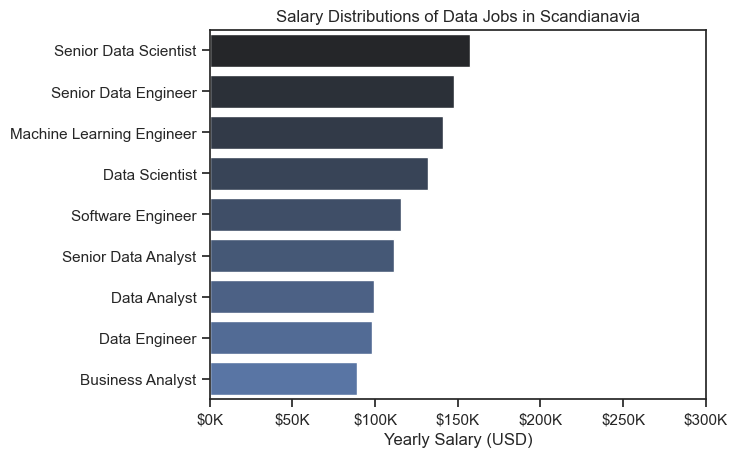

In [6]:
sns.barplot(data=df_Scand_job_salary, x='salary_year_avg', y='job_title_short', palette = 'dark:b')
sns.set_theme(style='ticks')
#sns.despine()

# Adding labels and formatting
plt.title('Salary Distributions of Data Jobs in Scandianavia')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [7]:
#Explode job_skills to have one skill per row
df_Scand = df_Scand.explode('job_skills')
df_Scand[['job_skills', 'salary_year_avg']].head(5)


,job_skills,salary_year_avg
2125,qlik,43200.0
8965,r,157500.0
8965,python,157500.0
8965,julia,157500.0
8965,redshift,157500.0


In [8]:
# Grouping by job skills and calculating median salary and sorting by median salary
df_Scand_skill_salary = df_Scand.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'median', ascending = False)
df_Scand_skill_salary = df_Scand_skill_salary.head(10)


In [9]:
# Grouping by job skills and calculating median salary and sorting by count of job skills
df_skill_count = df_Scand.groupby('job_skills')['salary_year_avg'].agg(['median', 'count']).sort_values(by = 'count')
df_skill_count = df_skill_count.head(10).sort_values(by = 'median', ascending = False)
df_skill_count

,median,count
job_skills,,
bash,249000.0,1
graphql,153500.0,1
assembly,134241.0,1
bitbucket,128682.0,1
alteryx,125000.0,1
dax,111175.0,1
gitlab,96773.0,1
elasticsearch,75000.0,1
golang,75000.0,1


C:\Users\Nora\AppData\Local\Temp\ipykernel_22780\429025924.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend().remove()
C:\Users\Nora\AppData\Local\Temp\ipykernel_22780\429025924.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend().remove()


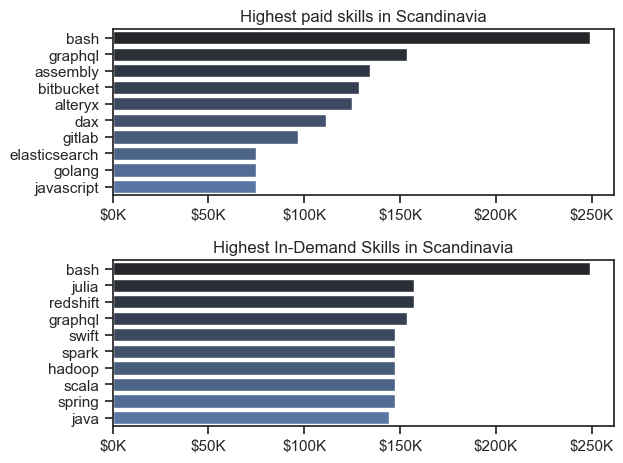

In [12]:
#Plotting two separate plots in one figure
fig, ax = plt.subplots(2, 1)

#Top highest paying skills in Scandinavia
#df_skill_count[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
sns.barplot(data = df_skill_count, x = 'median', y = df_skill_count.index, hue = df_skill_count.index, ax = ax[0], palette='dark:b')
ax[0].legend().remove()
ax[0].set_title('Highest paid skills in Scandinavia')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

#df_Scand_skill_salary[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
sns.barplot(data = df_Scand_skill_salary, x = 'median', y = df_Scand_skill_salary.index, hue = df_Scand_skill_salary.index, ax = ax[1], palette= 'dark:b')
ax[1].set_title('Highest In-Demand Skills in Scandinavia')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].legend().remove()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style = 'ticks')
plt.tight_layout()
plt.show()

In [11]:
palettes = sns.palettes.SEABORN_PALETTES
print(palettes)

{'deep': ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3', '#937860', '#DA8BC3', '#8C8C8C', '#CCB974', '#64B5CD'], 'deep6': ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD'], 'muted': ['#4878D0', '#EE854A', '#6ACC64', '#D65F5F', '#956CB4', '#8C613C', '#DC7EC0', '#797979', '#D5BB67', '#82C6E2'], 'muted6': ['#4878D0', '#6ACC64', '#D65F5F', '#956CB4', '#D5BB67', '#82C6E2'], 'pastel': ['#A1C9F4', '#FFB482', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#DEBB9B', '#FAB0E4', '#CFCFCF', '#FFFEA3', '#B9F2F0'], 'pastel6': ['#A1C9F4', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#FFFEA3', '#B9F2F0'], 'bright': ['#023EFF', '#FF7C00', '#1AC938', '#E8000B', '#8B2BE2', '#9F4800', '#F14CC1', '#A3A3A3', '#FFC400', '#00D7FF'], 'bright6': ['#023EFF', '#1AC938', '#E8000B', '#8B2BE2', '#FFC400', '#00D7FF'], 'dark': ['#001C7F', '#B1400D', '#12711C', '#8C0800', '#591E71', '#592F0D', '#A23582', '#3C3C3C', '#B8850A', '#006374'], 'dark6': ['#001C7F', '#12711C', '#8C0800', '#591E71', '#B8850A', '#006374'], 'col